In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from datetime import datetime
import yfinance as yf
yf.pdr_override()

c:\Users\cptfr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Lista de tickers
tickers = ["PETR4.SA", 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']
# Baixando os dados dos tickers
carteira = yf.download(tickers, start="2002-01-01", end='2023-12-31')['Adj Close']
# Baixando os dados do índice Ibovespa
ibov = yf.download('^BVSP', start="2002-01-01", end='2023-12-31')['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Caminho do arquivo JSON com os dados Retornos Direcionais
caminho_do_arquivo = r'C:\Users\cptfr\Desktop\TCC_B3_OPCOES\carteiras+estrategias\retornos_direcionais_op.json'

# Lendo o arquivo JSON e transformando em DataFrame para manipulação de dados
retornos_direcionais = pd.read_json(caminho_do_arquivo)
retornos_direcionais.index.name = 'Date'
retornos_direcionais.index = pd.to_datetime(retornos_direcionais.index, format='%Y%m%d')
retornos_direcionais

,OP_PETR,OP_VALE,OP_ITUB,OP_BBAS,OP_BBDC
Date,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN
2002-01-02,0.0,0.0,0.0,0.0,0.0
2002-01-03,0.0,0.0,0.0,0.0,0.0
2002-01-04,0.0,0.0,0.0,0.0,0.0
2002-01-07,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2023-12-21,0.0,0.0,0.0,0.0,0.0
2023-12-22,0.0,0.0,0.0,0.0,0.0
2023-12-26,0.0,0.0,0.0,0.0,0.0


In [4]:
carteira = carteira.pct_change()
df_combinado_outer = retornos_direcionais.join(carteira, how='outer')
df_combinado_outer

,OP_PETR,OP_VALE,OP_ITUB,OP_BBAS,OP_BBDC,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02,0.0,0.0,0.0,0.0,0.0,0.017941,0.000000,0.045515,0.001955,-0.019231
2002-01-03,0.0,0.0,0.0,0.0,0.0,0.015770,0.007614,-0.010925,0.006829,0.015687
2002-01-04,0.0,0.0,0.0,0.0,0.0,-0.022831,-0.003778,-0.016430,-0.006201,0.021235
2002-01-07,0.0,0.0,0.0,0.0,0.0,-0.022430,0.003793,-0.011117,0.021841,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,0.0,0.0,0.0,0.0,0.0,0.001476,-0.000646,0.006755,0.000275,0.033293
2023-12-22,0.0,0.0,0.0,0.0,0.0,0.002763,0.002485,0.015858,0.009618,-0.007535
2023-12-26,0.0,0.0,0.0,0.0,0.0,0.009184,0.003987,0.010207,0.016059,0.003535


In [5]:
def preencher_nans(df):
    # Preenche NaNs com o valor anterior (forward fill)
    df.ffill(inplace=True)
    # Para os casos onde o primeiro valor é NaN, preenche com o valor seguinte (backward fill)
    df.bfill(inplace=True)
    return df

In [6]:

carteiras_normalizadas = {}  # Dicionário para armazenar as carteiras de cada ano
valor_inicial_ativos = 8333.33  # Valor inicial para normalização
valor_inicial_opcoes = 1666.66
acoes_lista = ['BBAS3.SA','BBDC3.SA','ITUB4.SA','PETR4.SA','VALE3.SA']
opcoes_lista = ['OP_PETR','OP_VALE','OP_ITUB','OP_BBAS','OP_BBDC']

for ano in range(2002, 2024):
    # Filtrar dados do ano atual e preencher NaNs
    carteira_ano = preencher_nans(df_combinado_outer[f'{ano}-01-01':f'{ano}-12-31'].copy())
    # Se for o primeiro ano, normalizar com base no primeiro valor
    carteira_normalizada = pd.DataFrame(index=carteira_ano.index,columns=['BBAS3.SA','BBDC3.SA',
                                                                          'ITUB4.SA','PETR4.SA','VALE3.SA','OP_PETR','OP_VALE','OP_ITUB','OP_BBAS','OP_BBDC','Saldo'])
    if ano == 2002:
        for coluna in carteira_ano.columns:
            if coluna in acoes_lista:
                carteira_normalizada[coluna].iloc[0] = valor_inicial_ativos
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i])) + carteira_normalizada[coluna].iloc[i-1]
            elif coluna in opcoes_lista:
                carteira_normalizada[coluna].iloc[0] = valor_inicial_opcoes
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i])) + carteira_normalizada[coluna].iloc[i-1]
        carteira_normalizada['Saldo'] = carteira_normalizada.loc[:,['BBAS3.SA','BBDC3.SA','ITUB4.SA','PETR4.SA','VALE3.SA','OP_PETR','OP_VALE','OP_ITUB','OP_BBAS','OP_BBDC']].sum(axis=1)
        saldo_final = carteira_normalizada.iloc[-1]['Saldo']
        print(carteira_normalizada)
    else:     
        for coluna in carteira_ano.columns:
            if coluna in acoes_lista:
                carteira_normalizada[coluna].iloc[0] = valores/6
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i])) + carteira_normalizada[coluna].iloc[i-1]
            elif coluna in opcoes_lista: 
                carteira_normalizada[coluna].iloc[0] = (((valores)/6)/5)
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i])) + carteira_normalizada[coluna].iloc[i-1]   
        # Para os anos seguintes, usar o valor proporcional do final do ano anterior
        #carteira_normalizada = (carteira_ano / carteira_ano.iloc[0]) * valores
    # Calcular o saldo e armazenar o valor final para o rebalanceamento no próximo ano
    carteira_normalizada['Saldo'] = carteira_normalizada.loc[:,['BBAS3.SA','BBDC3.SA','ITUB4.SA','PETR4.SA','VALE3.SA','OP_PETR','OP_VALE','OP_ITUB','OP_BBAS','OP_BBDC']].sum(axis=1)
    valores = carteira_normalizada['Saldo'][-1]
    # Armazenar a carteira normalizada no dicionário
    carteiras_normalizadas[ano] = carteira_normalizada
# Concatenando todas as carteiras normalizadas em um único DataFrame
carteira_total = pd.concat(carteiras_normalizadas.values())
# Exibindo o DataFrame resultante
print(carteira_total)
carteira_total

               BBAS3.SA     BBDC3.SA     ITUB4.SA     PETR4.SA      VALE3.SA  \
Date                                                                           
2002-01-01      8333.33      8333.33      8333.33      8333.33       8333.33   
2002-01-02  8482.837871      8333.33  8712.617726  8349.624802   8173.073301   
2002-01-03  8616.615449  8396.782697  8617.435638  8406.645233   8301.280336   
2002-01-04  8419.888476  8365.056348  8475.852589  8354.511979   8477.559772   
2002-01-07  8231.033705  8396.782697  8381.626006  8536.979632   8477.559772   
...                 ...          ...          ...          ...           ...   
2002-12-25  7743.151904  7127.748113  8049.708255   7943.95249  16043.263872   
2002-12-26  7711.674854  7043.144356  7957.363822  7803.841209  16346.146603   
2002-12-27  7632.981055  7614.215724  7990.514208  7600.194106  16346.146603   
2002-12-30  7711.674854  8090.095953  8120.730059  7559.464685  16490.381612   
2002-12-31  7711.674854  8090.095953  81

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,OP_PETR,OP_VALE,OP_ITUB,OP_BBAS,OP_BBDC,Saldo
Date,,,,,,,,,,,
2002-01-01,8333.33,8333.33,8333.33,8333.33,8333.33,1666.66,1666.66,1666.66,1666.66,1666.66,4.999995e+04
2002-01-02,8482.837871,8333.33,8712.617726,8349.624802,8173.073301,1666.66,1666.66,1666.66,1666.66,1666.66,5.038478e+04
2002-01-03,8616.615449,8396.782697,8617.435638,8406.645233,8301.280336,1666.66,1666.66,1666.66,1666.66,1666.66,5.067206e+04
2002-01-04,8419.888476,8365.056348,8475.852589,8354.511979,8477.559772,1666.66,1666.66,1666.66,1666.66,1666.66,5.042617e+04
2002-01-07,8231.033705,8396.782697,8381.626006,8536.979632,8477.559772,1666.66,1666.66,1666.66,1666.66,1666.66,5.035728e+04
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,270487.013605,176994.953118,197569.188332,289719.542576,129067.952375,28198.855398,28198.855398,28198.855398,19739.198779,19739.198779,1.187914e+06
2023-12-22,271234.318025,177434.864101,200702.315924,292506.085611,128095.370192,28198.855398,28198.855398,28198.855398,19739.198779,19739.198779,1.194048e+06
2023-12-26,273725.462283,178142.252733,202750.932075,297203.400084,128548.133415,28198.855398,28198.855398,28198.855398,19739.198779,19739.198779,1.204445e+06


<AxesSubplot:xlabel='Date'>

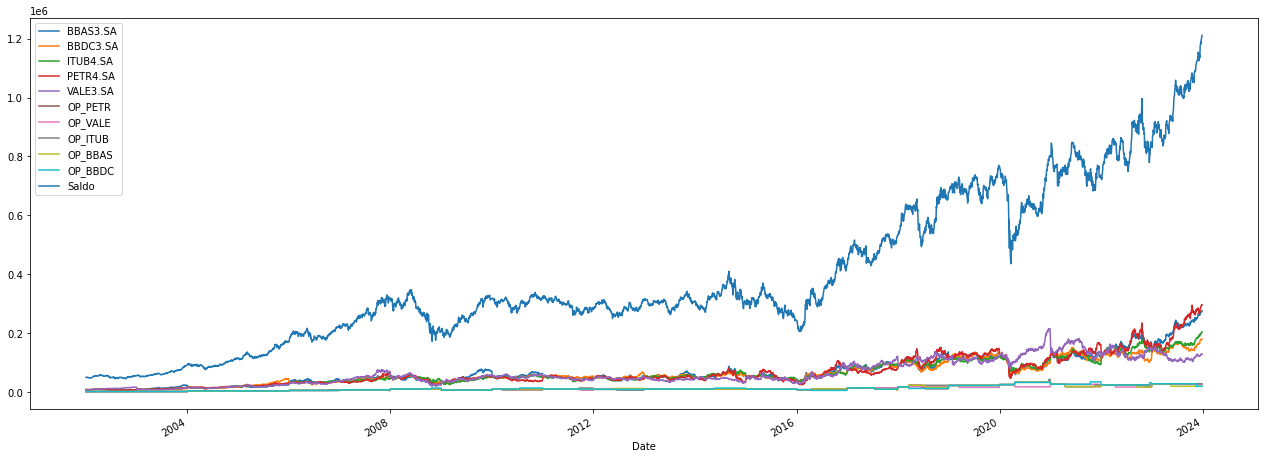

In [7]:
carteira_total.plot(figsize=(22,8))

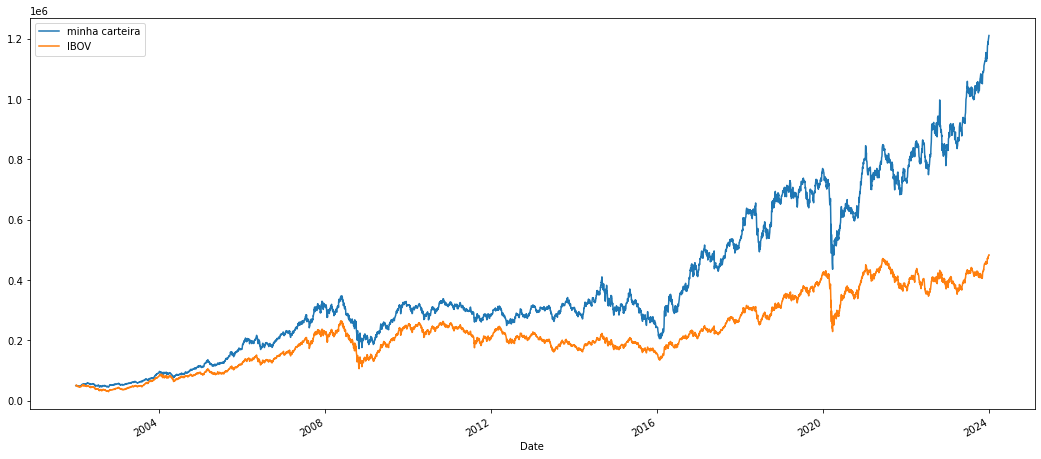

In [8]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado
carteira_total["Saldo"].plot(figsize=(18,8), label='minha carteira')
ibov_normalizado.plot(label="IBOV")
plt.legend()